In [44]:
import os
from pprint import pprint

In [45]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
from scipy.io.arff import loadarff # type: ignore
import seaborn as sns # type: ignore

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt # type: ignore

In [47]:
data_test = loadarff(os.path.join("ECG5000", "ECG5000_TEST.arff"))
data_train = loadarff(os.path.join("ECG5000", "ECG5000_TRAIN.arff"))

In [100]:
class_names = ['Normal', 'R on T', 'PVC', 'SP', 'UB']
colors = plt.cm.rainbow

In [48]:
dataset = pd.concat([pd.DataFrame(data_test[0]), pd.DataFrame(data_train[0])])
dataset.shape #видим что в датасете 5000 примеров и 141 признак
dataset.keys()

Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10',
       ...
       'att132', 'att133', 'att134', 'att135', 'att136', 'att137', 'att138',
       'att139', 'att140', 'target'],
      dtype='object', length=141)

In [49]:
dataset

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,3.690844,0.711414,-2.114091,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,0.334577,...,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073,b'1'
1,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,-0.397999,...,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009,b'1'
2,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,-1.440680,...,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767,b'1'
3,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,-1.202146,...,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853,b'1'
4,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,-0.521316,...,1.280823,1.494315,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.478577,-1.779959,-2.398159,-3.170112,-3.559732,-3.573956,-2.989770,-2.270605,-1.688277,-1.359872,...,1.160885,1.456331,2.209421,2.507175,2.198534,1.705849,1.492642,1.561890,1.520161,b'4'
496,-1.325210,-2.480992,-2.965356,-3.342392,-3.176351,-2.891528,-2.369679,-1.598750,-1.071751,-0.891843,...,-0.172154,-0.864803,-1.549854,-2.460243,-3.366562,-3.466546,-2.718380,-1.855209,-1.539958,b'4'
497,-0.021964,-0.912434,-1.903353,-2.662829,-3.122156,-3.451490,-3.392982,-2.929937,-2.256294,-1.690706,...,1.339479,1.457995,2.128078,2.630759,2.295748,1.764967,1.444280,1.432347,1.457028,b'4'
498,0.288011,-1.098020,-2.500250,-3.598599,-3.650608,-3.281587,-2.231601,-1.250656,-1.072574,-0.434310,...,-0.029242,0.071414,0.118161,-0.071967,-0.171214,0.131211,0.049872,0.010915,-0.081534,b'5'


In [50]:
dataset["target"].value_counts()

b'1'    2919
b'2'    1767
b'4'     194
b'3'      96
b'5'      24
Name: target, dtype: int64

C:\Users\artem\AppData\Local\Temp\ipykernel_18168\1014747810.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names)


Text(0.5, 0, 'Классы')

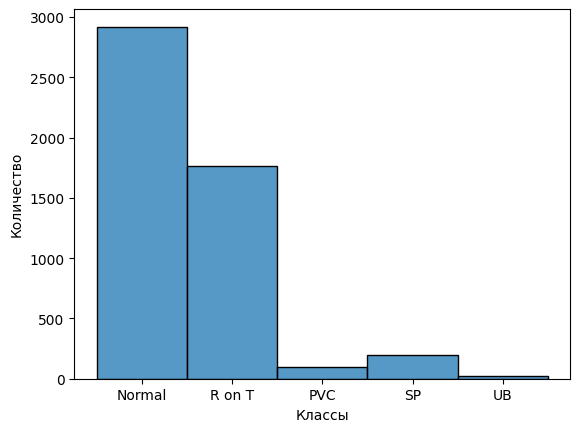

In [78]:
ax = sns.histplot(dataset["target"])
ax.set_xticklabels(class_names)
ax.set_ylabel("Количество")
ax.set_xlabel("Классы")


In [67]:
from numpy import float32
from pandas import DataFrame, Series

df = DataFrame()

df["target"] = dataset["target"]
df["data"] = dataset.iloc[:, :-1].values.astype(float32).tolist()

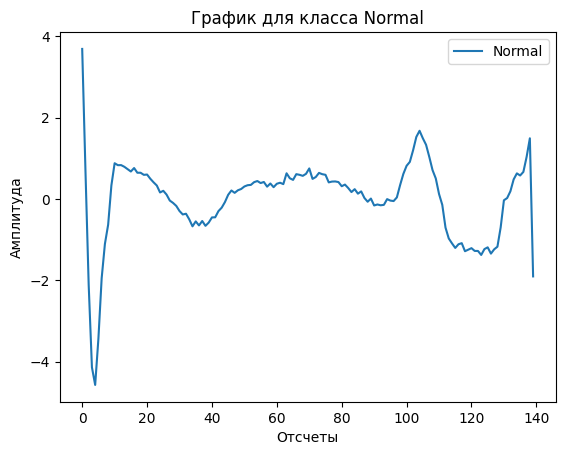

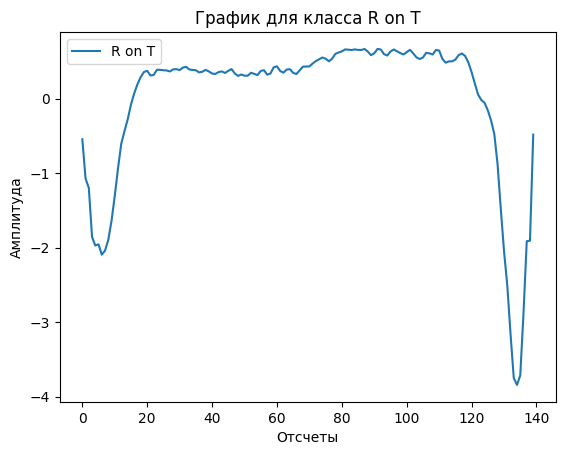

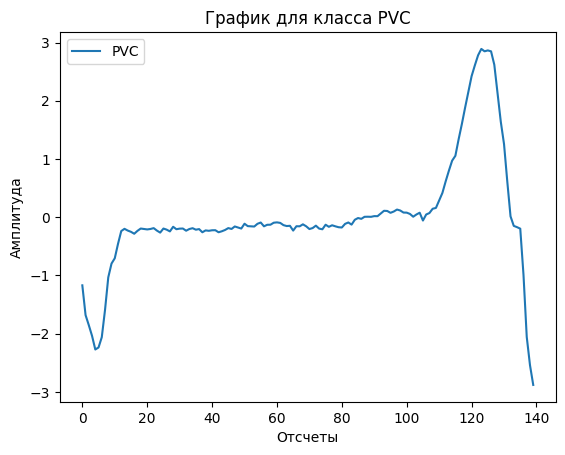

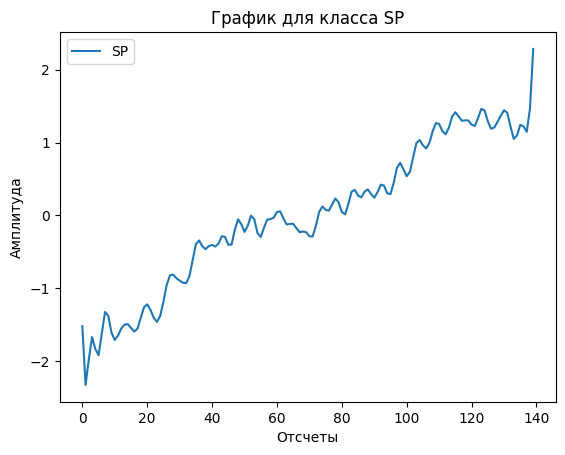

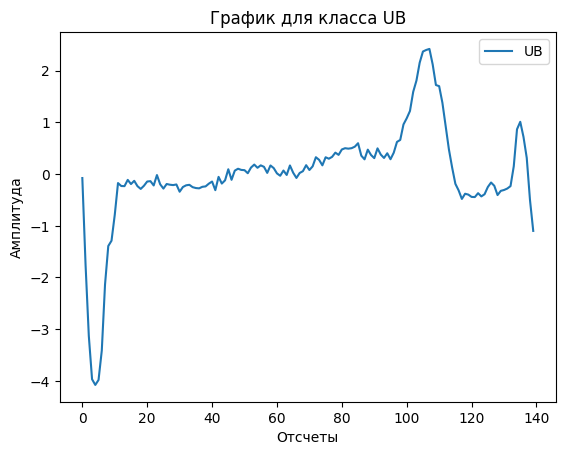

In [104]:
unique_targets = df['target'].unique().tolist()

for target in unique_targets:
    # Фильтрация данных по текущему классу
    class_data = df[df['target'] == target]
    
    # Выбор уникальных строк для текущего класса по уникальным значениям в столбце 'столбец_1'
    unique_rows = class_data.drop_duplicates(subset=['target'])
    
    # Построение графика для текущего класса
    plt.figure()
    for index_, sample_ in enumerate(unique_rows.data):
        plt.plot(sample_, label=f"{class_names[int(target)-1]}")
    plt.legend()
    plt.title(f'График для класса {class_names[int(target)-1]}')
    plt.xlabel('Отсчеты')
    plt.ylabel('Амплитуда')
    plt.show()

In [64]:
normal = df[df["target"] == b"1"]

normal

,target,data
0,b'1',"[3.6908442974090576, 0.7114143371582031, -2.11..."
1,b'1',"[-1.3481322526931763, -3.996037483215332, -4.2..."
2,b'1',"[1.0242946147918701, -0.5903142094612122, -1.9..."
3,b'1',"[0.5456569194793701, -1.0143829584121704, -2.3..."
4,b'1',"[0.6611328125, -1.5524705648422241, -3.1246407..."
...,...,...
287,b'1',"[1.513541579246521, 1.7032984495162964, 0.1058..."
288,b'1',"[-0.3506791889667511, -1.7977232933044434, -3...."
289,b'1',"[-2.6528186798095703, -3.7067763805389404, -3...."
290,b'1',"[1.6631983518600464, -0.08141589909791946, -1...."


Нормализация данных ЭКГ с использованием Z-score Normalization с помощью библиотеки scikit-learn в Python


<b>Z-оценка (Z-score)</b> - это один из методов нормализации данных, который приводит значения признаков к стандартному нормальному распределению со средним значением 0 и стандартным отклонением 1. Этот метод полезен, когда данные имеют разные масштабы или когда распределение данных неизвестно.

In [53]:
from sklearn.preprocessing import StandardScaler, normalize, scale

data = dataset.iloc[:, :-1].values.astype(float32)
pprint(f"Средние значения: {data.mean()}")
pprint(f"Стандартное отклонение: {data.std()}")

scaler = StandardScaler()
normalized_features = scaler.fit_transform(data)
normalized_features

'Средние значения: -1.2207030941624453e-08'
'Стандартное отклонение: 0.9964221715927124'


array([[ 3.4309459 ,  1.6334649 ,  0.27276024, ...,  0.9027221 ,
         1.0812345 , -0.84780145],
       [-0.94220257, -1.6235029 , -1.2512268 , ...,  0.48937124,
         0.85120535, -0.3238306 ],
       [ 1.1167423 ,  0.7328316 ,  0.41497082, ...,  1.3224413 ,
         1.0712261 ,  1.4818207 ],
       ...,
       [ 0.20873186,  0.5099652 ,  0.42477864, ...,  1.1223345 ,
         1.0484949 ,  1.5293782 ],
       [ 0.477748  ,  0.38156304, -0.00579902, ...,  0.3722938 ,
         0.27209717,  0.44153503],
       [-0.75608164, -0.7288417 , -0.4535681 , ...,  0.28584787,
         0.26715025,  0.41247156]], dtype=float32)

l2 нормализация используется если выбросы играют важную роль

In [54]:
normalized_features_l2 = normalize(data, norm="l2")

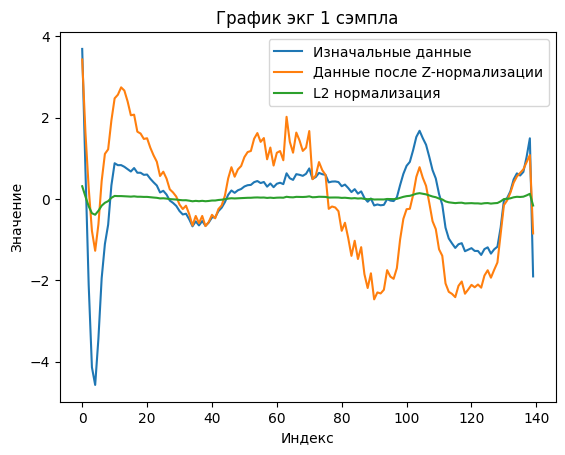

In [55]:
plt.title('График экг 1 сэмпла')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.plot(data[0], label='Изначальные данные')
plt.plot(normalized_features[0], label='Данные после Z-нормализации')
plt.plot(normalized_features_l2[0], label='L2 нормализация')
plt.legend()

In [56]:
means = [np.mean(subarray) for subarray in data]
std_devs = [np.std(subarray) for subarray in data]

for i, (mean, std_dev) in enumerate(zip(means, std_devs)):
    print(f"{i+1}: Среднее = {mean}, Стандартное отклонение = {std_dev}")

1: Среднее = 0.0, Стандартное отклонение = 0.9964221715927124
2: Среднее = -2.72478377638663e-08, Стандартное отклонение = 0.9964221715927124
3: Среднее = 0.0, Стандартное отклонение = 0.9964221715927124
4: Среднее = 0.0, Стандартное отклонение = 0.9964221715927124
5: Среднее = -2.72478377638663e-08, Стандартное отклонение = 0.9964221715927124
6: Среднее = -2.72478377638663e-08, Стандартное отклонение = 0.9964221715927124
7: Среднее = -1.362391888193315e-08, Стандартное отклонение = 0.9964221119880676
8: Среднее = -2.72478377638663e-08, Стандартное отклонение = 0.9964221715927124
9: Среднее = -2.72478377638663e-08, Стандартное отклонение = 0.9964221715927124
10: Среднее = 2.72478377638663e-08, Стандартное отклонение = 0.9964221715927124
11: Среднее = 0.0, Стандартное отклонение = 0.9964221715927124
12: Среднее = 0.0, Стандартное отклонение = 0.9964221715927124
13: Среднее = 0.0, Стандартное отклонение = 0.9964221715927124
14: Среднее = 0.0, Стандартное отклонение = 0.9964221715927124
1